## Bayes' Theorem Question:

*A jewelry store owner was murdered, and DNA evidence from the crime scene was compared against a national database of 100,000 people, yielding a single match: Simon Mazorodze. The DNA test has a 0.5% false positive rate (P(Match | Not Guilty) = 0.005) and never produces false negatives (P(No Match | Guilty) = 0). Assuming the perpetrator is in the database and each person is equally likely to be guilty (prior probability P(Guilty) = 1/100,000):*

- Calculate P(Guilty | Match) using Bayes’ Theorem. Interpret the result: Does the DNA match definitively prove guilt?

- Argument: If you were the defense attorney, how would you argue that this DNA match alone doesn’t establish guilt beyond reasonable doubt? Consider the statistical implications of database size and false positives.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
## 1. Define the Forensic DNA Scenario
database_size = 100000
false_positive_rate = 0.005  # 0.5%
false_negative_rate = 0.0

print(f"""Forensic Investigation Scenario:
- National DNA database size: {database_size:,} people
- DNA test characteristics:
  - False positive rate: {false_positive_rate*100}% 
  - False negative rate: {false_negative_rate*100}%
- Single match found: Simon Mazorodze
""")

Forensic Investigation Scenario:
- National DNA database size: 100,000 people
- DNA test characteristics:
  - False positive rate: 0.5% 
  - False negative rate: 0.0%
- Single match found: Simon Mazorodze



In [5]:
## 2. Bayesian Probability Calculation
def calculate_guilt_probability(database_size, false_positive_rate):
    # Prior probability (before seeing DNA evidence)
    P_Guilty = 1/database_size  
    P_NotGuilty = 1 - P_Guilty
    
    # Likelihoods
    P_Match_given_Guilty = 1 - false_negative_rate  # True positive rate
    P_Match_given_NotGuilty = false_positive_rate
    
    # Marginal probability of a match
    P_Match = (P_Match_given_Guilty * P_Guilty) + (P_Match_given_NotGuilty * P_NotGuilty)
    
    # Posterior probability using Bayes' Theorem
    P_Guilty_given_Match = (P_Match_given_Guilty * P_Guilty) / P_Match
    
    return {
        'Prior P(Guilty)': P_Guilty,
        'P(Match|Guilty)': P_Match_given_Guilty,
        'P(Match|Not Guilty)': P_Match_given_NotGuilty,
        'P(Match)': P_Match,
        'Posterior P(Guilty|Match)': P_Guilty_given_Match
    }

results = calculate_guilt_probability(database_size, false_positive_rate)


In [6]:
## 3. Display Results
print("\nBayesian Probability Calculation:")
for k, v in results.items():
    print(f"{k}: {v:.8f} ({v*100:.4f}%)")


Bayesian Probability Calculation:
Prior P(Guilty): 0.00001000 (0.0010%)
P(Match|Guilty): 1.00000000 (100.0000%)
P(Match|Not Guilty): 0.00500000 (0.5000%)
P(Match): 0.00500995 (0.5010%)
Posterior P(Guilty|Match): 0.00199603 (0.1996%)


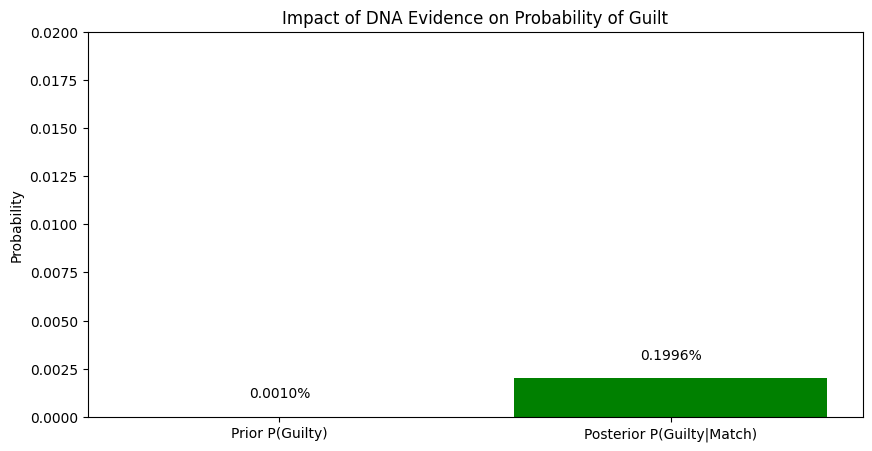

In [7]:
# 4. Visualization
plt.figure(figsize=(10, 5))
plt.bar(['Prior P(Guilty)', 'Posterior P(Guilty|Match)'], 
        [results['Prior P(Guilty)'], results['Posterior P(Guilty|Match)']],
        color=['red', 'green'])
plt.title("Impact of DNA Evidence on Probability of Guilt")
plt.ylabel("Probability")
plt.ylim(0, 0.02)
for i, v in enumerate([results['Prior P(Guilty)'], results['Posterior P(Guilty|Match)']]):
    plt.text(i, v+0.001, f"{v*100:.4f}%", ha='center')
plt.show()

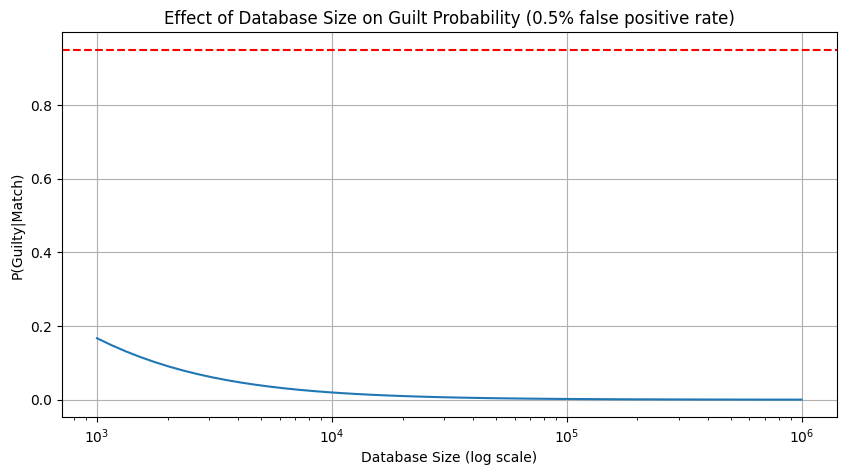

In [8]:
## 5. Sensitivity Analysis
database_sizes = np.logspace(3, 6, 50)  # From 1,000 to 1,000,000
probabilities = [calculate_guilt_probability(int(size), false_positive_rate)['Posterior P(Guilty|Match)'] 
                 for size in database_sizes]

plt.figure(figsize=(10, 5))
plt.plot(database_sizes, probabilities)
plt.xscale('log')
plt.title("Effect of Database Size on Guilt Probability (0.5% false positive rate)")
plt.xlabel("Database Size (log scale)")
plt.ylabel("P(Guilty|Match)")
plt.axhline(y=0.95, color='r', linestyle='--', label='95% confidence threshold')
plt.grid(True)
plt.show()

In [9]:
## 6. Practical Interpretation
print("""
Practical Significance:

1. The posterior probability of {:.4f}% means that even with a DNA match:
   - There's a {:.2f}% chance Simon is guilty
   - But a {:.2f}% chance the match is false

2. Legal Implications:
   - DNA evidence alone cannot establish guilt beyond reasonable doubt
   - With large databases, false positives become significant
   - Courts must consider:
     * Database size
     * False positive rates
     * Alternative evidence

3. Bayesian Thinking:
   - Shows how prior probabilities (base rates) affect conclusions
   - Demonstrates why 'match' doesn't equal 'guilty'
   - Provides quantitative framework for evaluating evidence
""".format(results['Posterior P(Guilty|Match)']*100,
           results['Posterior P(Guilty|Match)']*100,
           (1-results['Posterior P(Guilty|Match)'])*100))



Practical Significance:

1. The posterior probability of 0.1996% means that even with a DNA match:
   - There's a 0.20% chance Simon is guilty
   - But a 99.80% chance the match is false

2. Legal Implications:
   - DNA evidence alone cannot establish guilt beyond reasonable doubt
   - With large databases, false positives become significant
   - Courts must consider:
     * Database size
     * False positive rates
     * Alternative evidence

3. Bayesian Thinking:
   - Shows how prior probabilities (base rates) affect conclusions
   - Demonstrates why 'match' doesn't equal 'guilty'
   - Provides quantitative framework for evaluating evidence



In [11]:
## 7. Defense Attorney's Argument:  practical significance of Bayesian inference.
print("""Defense Argument Outline:

1. Statistical Uncertainty:
   - With a 0.5% false positive rate, we'd expect {} random matches in this database
   - The match could easily be one of these false positives

2. Base Rate Neglect:
   - The initial 1 in 100,000 chance is crucial context
   - Even after the match, the probability remains just {:.2f}%

3. Alternative Explanations:
   - The defendant may have been at the scene innocently
   - Evidence transfer could have occurred
   - Lab errors aren't accounted for in the 0.5% rate

4. Conclusion:
   - Reasonable doubt clearly exists
   - DNA evidence alone is insufficient for conviction
""".format(int(database_size*false_positive_rate),
results['Posterior P(Guilty|Match)']*100))

Defense Argument Outline:

1. Statistical Uncertainty:
   - With a 0.5% false positive rate, we'd expect 500 random matches in this database
   - The match could easily be one of these false positives

2. Base Rate Neglect:
   - The initial 1 in 100,000 chance is crucial context
   - Even after the match, the probability remains just 0.20%

3. Alternative Explanations:
   - The defendant may have been at the scene innocently
   - Evidence transfer could have occurred
   - Lab errors aren't accounted for in the 0.5% rate

4. Conclusion:
   - Reasonable doubt clearly exists
   - DNA evidence alone is insufficient for conviction

